# Elements of Convex Optimization 2025 - Homework 3

### Solution author: <Mikołaj Nowak, 151813>

The purpose of this notebook is to implement Gradient Descent.
The notebook uses helper functions to plot functions (in [eco_hw3_helpers.py](eco_hw3_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**, **seaborn** and **[autograd](https://github.com/HIPS/autograd)** libraries.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This line makes the graphs show up in the notebook, so you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports (for drawing):
from eco_hw3_helpers import plot_steps_1d, plot_steps_2d

import numpy as np
from autograd import grad
import autograd.numpy as anp


## Sample random walk for presentation


In [3]:
# Takes initial point and function (ignores function) and takes 10 random steps
# Tt works regardless of dimensionality
def random_walk(f, x0, steps=10):
    x = np.array(x0)
    points = [x]
    for _ in range(steps):
        x = x + (np.random.random(np.shape(x)) - 0.5) * 2
        points.append(x)
    return points

## Plotting 1D function

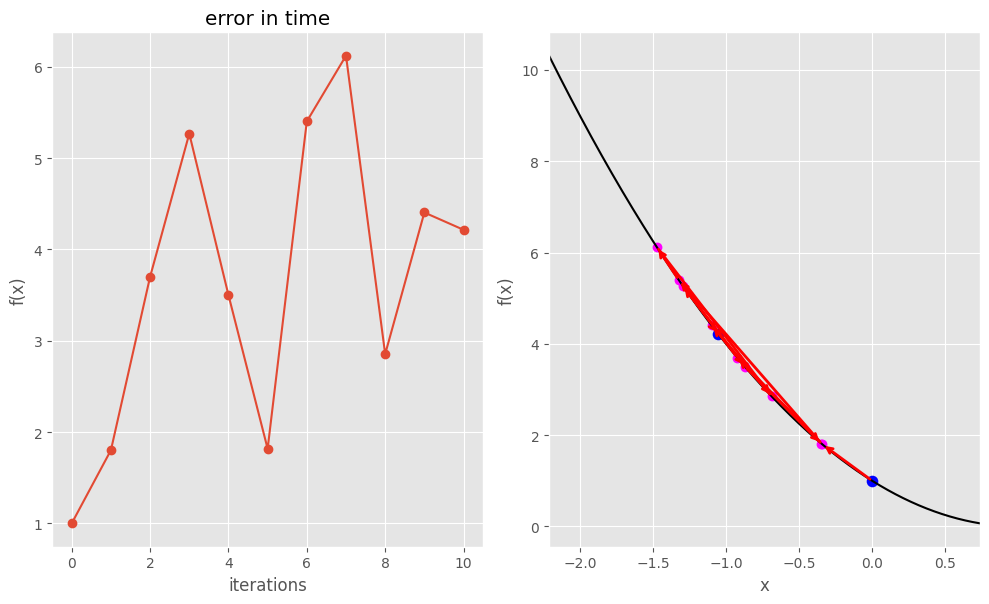

In [4]:
f = lambda x: (x - 1) ** 2
x0 = 0.0
points = random_walk(f, x0)
plot_steps_1d(f, points)

## Plotting 2D function

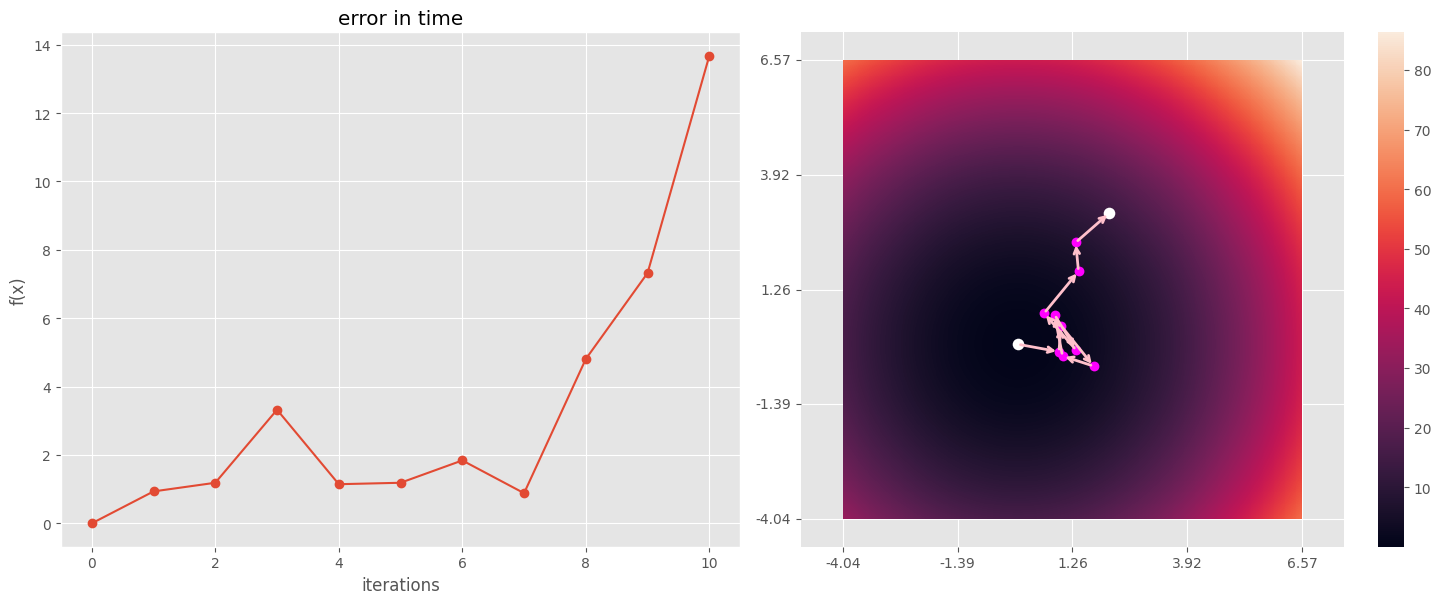

In [5]:
f = lambda x: x @ x
x0 = np.zeros(2)
points = random_walk(f, x0)
plot_steps_2d(f, points)

## Task 1

Implement gradient descent method with the constant learning rate, that does specified number of steps. Use autograd library (`grad` function) to calculate the gradient of the function.

In [11]:
from autograd import grad

def gd(f, x0, learning_rate=0.1, steps=10):
    x = np.array(x0)
    gradient = grad(f)
    points = [x.copy()]

    for _ in range(steps):
        x -= learning_rate * gradient(x)
        points.append(x.copy())

    return points



### Test it for simple 1D functions

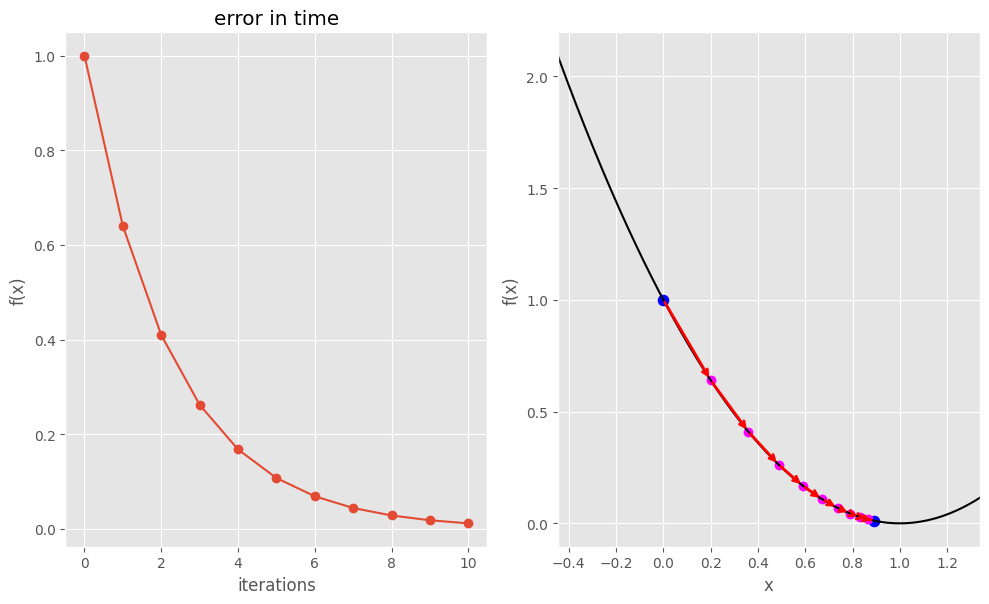

In [12]:
f = lambda x: (x-1) ** 2
# f = lambda x: -(x - 1) ** 2
# f = lambda x: x
# f = lambda x: (x - 1) ** 2 + 4 * (0.5 * anp.sin((x - 1) * 10)) ** 2

x0 = 0.0
points = gd(f, x0, learning_rate=0.1, steps=10)
plot_steps_1d(f, points)


### Test if i works for 2D functions as well


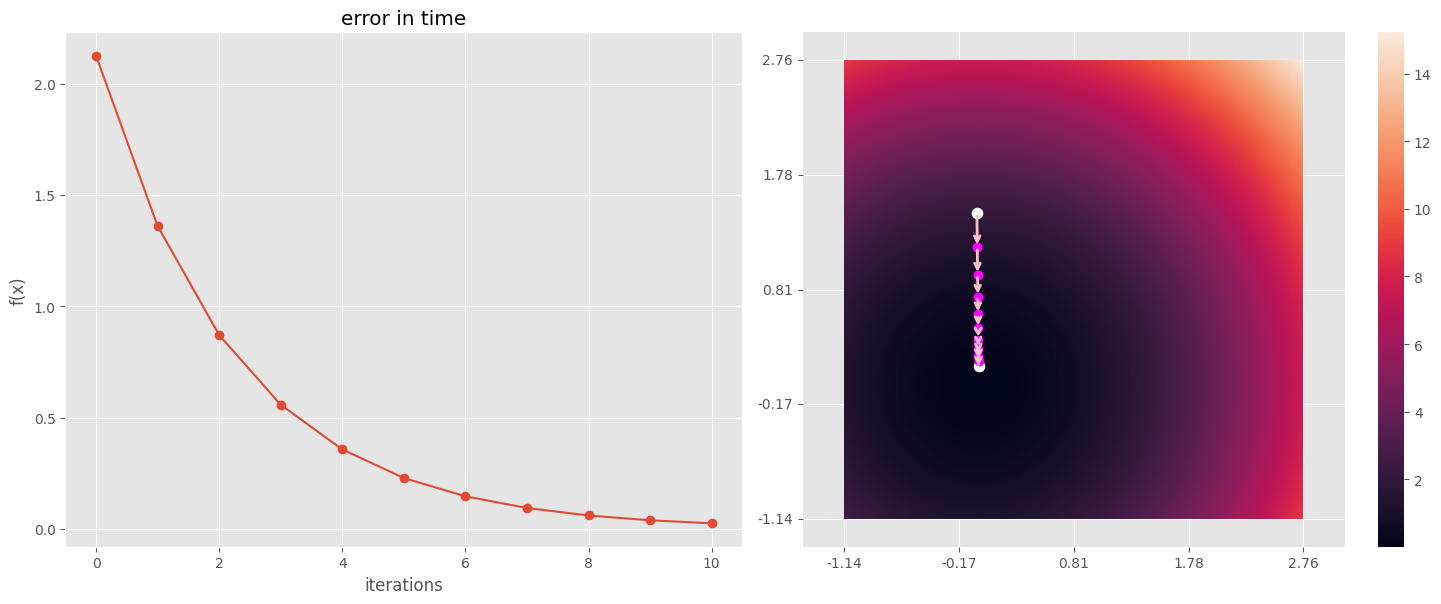

In [13]:
f = lambda x:  x @ x
# f = lambda x: -x @ x
# f = lambda x: np.array([1,2]) * x @ x
# f = lambda x: np.array([1,5]) * x @ x

x0 = np.random.random(2)*6 - 3
points = gd(f, x0, learning_rate=0.1, steps=10)
plot_steps_2d(f, points)

## Task 2

Implement Cachy method for 2D functions and compare it to gd? 

Question: Why is it pointless to implement 1D version?

Implementation hint: You may reuse 1D optimization method implementations (for first homework) to find best eta in each step.

In [14]:
from scipy.optimize import minimize_scalar

def cauchy(f, x0, steps=10):
    gradient_f = grad(f)
    x = np.array(x0, dtype=float)
    points = [x.copy()]

    for _ in range(steps):
        g = gradient_f(x)

        # Line search: minimize f(x - eta * g) over eta
        def f_line(eta):
            return f(x - eta * g)

        res = minimize_scalar(f_line)
        eta_opt = res.x

        x = x - eta_opt * g
        points.append(x.copy())

    return points


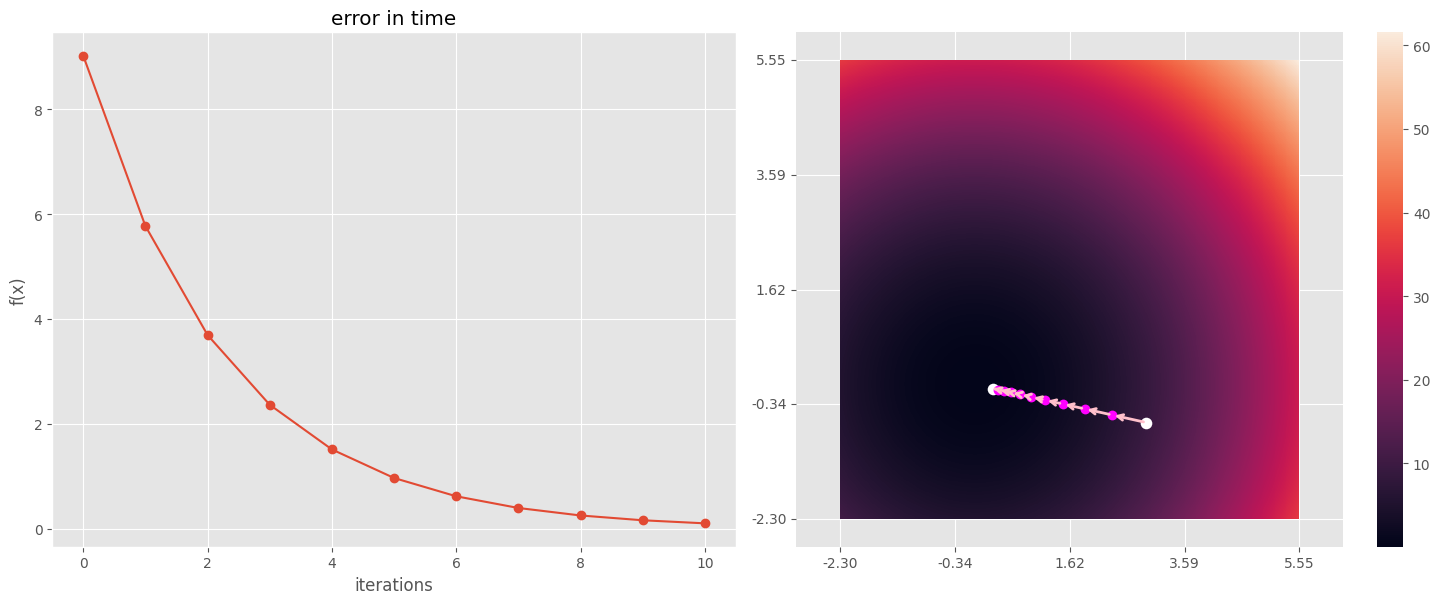

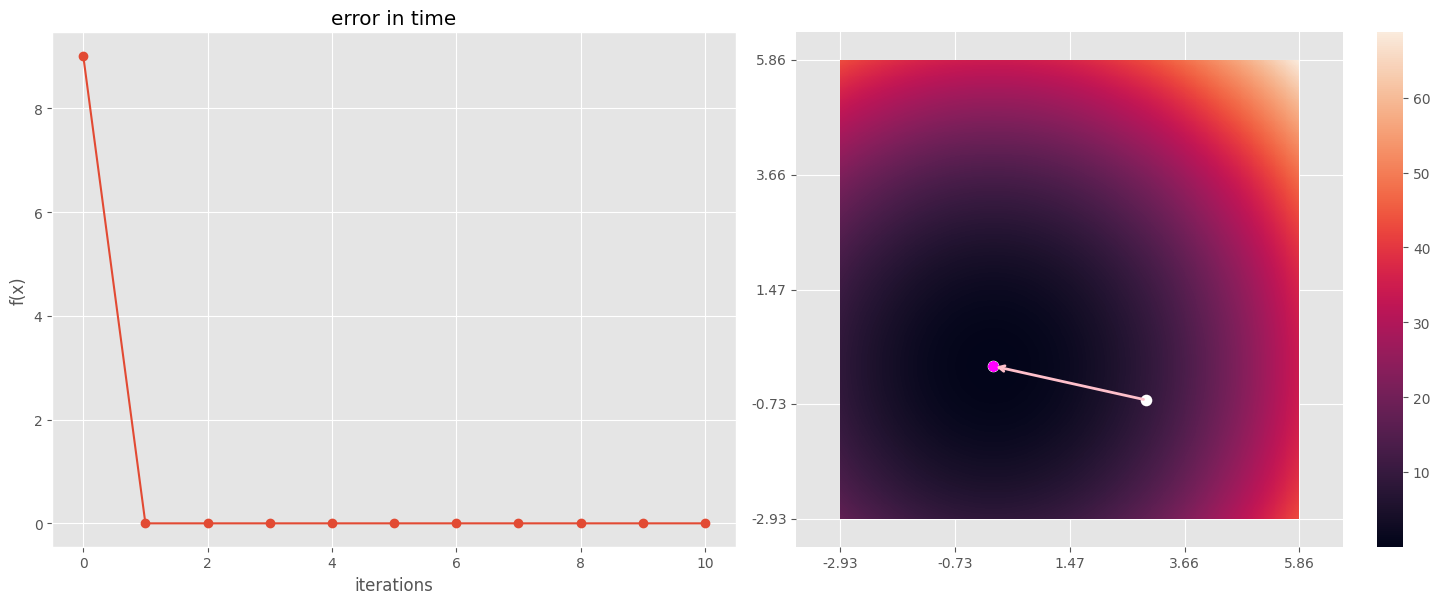

In [15]:
f = lambda x: x @ x
# f = lambda x: -x @ x
# f = lambda x: np.array([1,2]) * x @ x
# f = lambda x: np.array([1,10]) * x @ x

x0 = np.random.random(2)*6 - 3
gd_points = gd(f, x0, learning_rate=0.1)
cauchy_points = cauchy(f, x0)
plot_steps_2d(f, gd_points)
plot_steps_2d(f, cauchy_points)